<a href="https://colab.research.google.com/github/umberH/2023_datathon_uni_sydney/blob/main/Intro_to_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning Course

Welcome to the "**Introduction to Machine Learning**" course, your gateway to the exciting world of artificial intelligence and data-driven decision-making. In today's digital era, the ability to harness the power of data and automate decision-making processes is not just a luxury but a necessity for success in various fields.

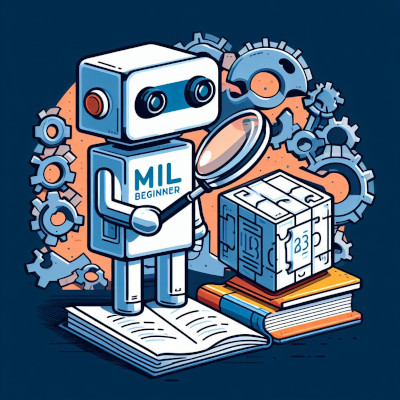

✍ Author: Ambreen Hanif

🥳 Datathon 2023

🙏 To Sydney University Data Society for the opportunity



# Getting Started



*   Starts with a Quick Questionnaire
*   Introduction to Machine Learning
*   Introduction to Machine learning Package (Scikit-Learn)



## Goal
The goal of this course is help to understand how can we use machine learning  even without a strong technical background.

# Prerequisites :
The course aims to be helpful without a strong technical background. The requirements for this course are:

✅ Basic knowledge of  programming : defining variables, functions, importing modules

# What is Machine Learning?

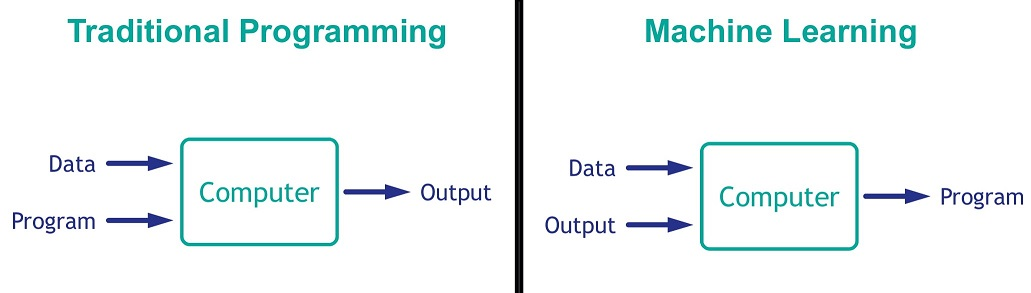
(:copyright MIT Open Source)

On a high level, machine learning (ML) processes is comprised of a various steps:

. Most ML processes start by asking a question that

1.   **Problem**🤔 Find the question that cannot be answered by simple rule based engine.
2. **Data**📓 What do you need to answer the question?
3. **Model** 🧠 How you want the data to be learned?
4. **Train** 🏋 Give the data to the model to train.
5. **Evaluate** 🤯 How is the system performing on unseen data?
6. **Parameter Tunning** 🛠 Based on the above performance we chance the control parameter to tune the behaviour of the algorithm.
7. **Predict** 😯 The model provides answer to your questions.  



scikit-learn can help us to go through all

History of Machine Learning
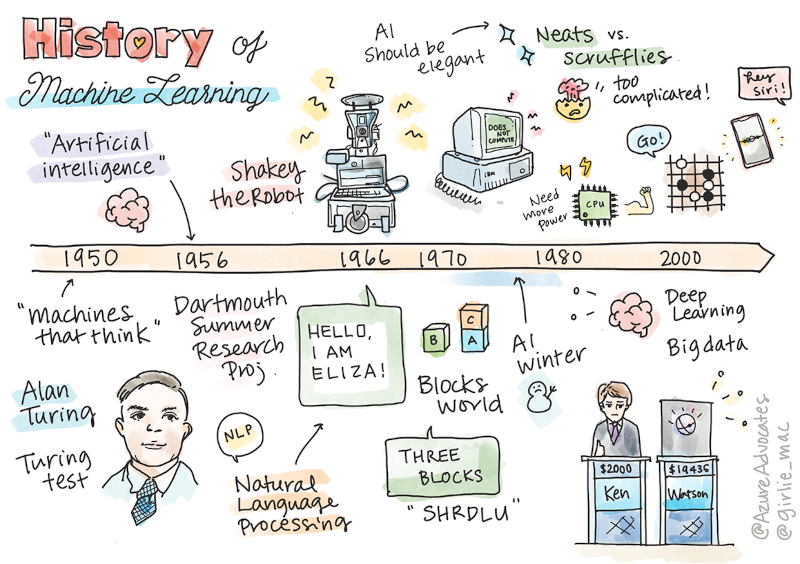

# Problem Statement

How can we find a problem.

We have a set of data for the cancer patients and we want to learn how can we **classify** new patients as Benin or melignent based on the given data


(**classification**)


We have a dataset of houses and the features and we want to identify the house price based on those features?

(**Regression**)


List of ML Algorithms

(Photo: Analytics Vidhya)

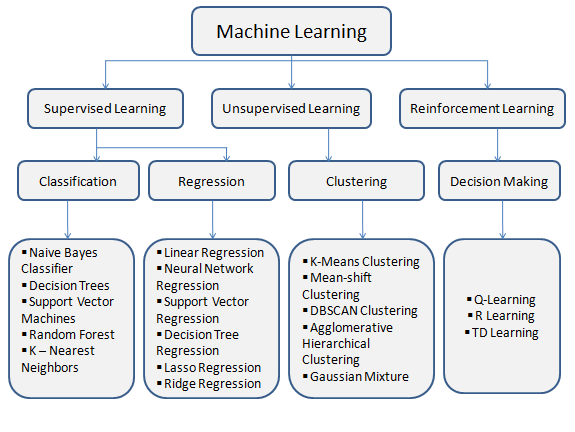

# Import library if not using colab

pip install package name

# Visualization Packages

* [matplotlib](https://matplotlib.org/stable/api/index.html)
* [Seaborn](https://seaborn.pydata.org/api.html)
* [Plotly](https://plotly.com/python-api-reference/)




In [448]:
# Import Libraries

import pandas as pd
# data sets
from sklearn.datasets import load_breast_cancer

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# training set split
from sklearn.model_selection import train_test_split

# classifier
from sklearn.tree import DecisionTreeClassifier
# metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, accuracy_score,roc_curve,roc_auc_score, auc
from sklearn import metrics

# Data

* Collect Data
* Prepare Data


List of available datasets in [sklearn](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.datasets)




In [364]:
data = load_breast_cancer()
data.feature_names


array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [365]:
cancer = load_breast_cancer()
print(
    cancer.keys())



dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [366]:
data = pd.DataFrame(cancer.data, columns=[cancer.feature_names])
print(data.describe())


      mean radius mean texture mean perimeter    mean area mean smoothness  \
count  569.000000   569.000000     569.000000   569.000000      569.000000   
mean    14.127292    19.289649      91.969033   654.889104        0.096360   
std      3.524049     4.301036      24.298981   351.914129        0.014064   
min      6.981000     9.710000      43.790000   143.500000        0.052630   
25%     11.700000    16.170000      75.170000   420.300000        0.086370   
50%     13.370000    18.840000      86.240000   551.100000        0.095870   
75%     15.780000    21.800000     104.100000   782.700000        0.105300   
max     28.110000    39.280000     188.500000  2501.000000        0.163400   

      mean compactness mean concavity mean concave points mean symmetry  \
count       569.000000     569.000000          569.000000    569.000000   
mean          0.104341       0.088799            0.048919      0.181162   
std           0.052813       0.079720            0.038803      0.027414 

In [367]:
list(cancer.target_names)

['malignant', 'benign']

In [368]:
display(cancer.DESCR)

'.. _breast_cancer_dataset:\n\nBreast cancer wisconsin (diagnostic) dataset\n--------------------------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 569\n\n    :Number of Attributes: 30 numeric, predictive attributes and the class\n\n    :Attribute Information:\n        - radius (mean of distances from center to points on the perimeter)\n        - texture (standard deviation of gray-scale values)\n        - perimeter\n        - area\n        - smoothness (local variation in radius lengths)\n        - compactness (perimeter^2 / area - 1.0)\n        - concavity (severity of concave portions of the contour)\n        - concave points (number of concave portions of the contour)\n        - symmetry\n        - fractal dimension ("coastline approximation" - 1)\n\n        The mean, standard error, and "worst" or largest (mean of the three\n        worst/largest values) of these features were computed for each image,\n        resulting in 30 features.  For inst

In [369]:
data = data.assign(target=pd.Series(cancer.target))
print(data.describe())


      mean radius mean texture mean perimeter    mean area mean smoothness  \
count  569.000000   569.000000     569.000000   569.000000      569.000000   
mean    14.127292    19.289649      91.969033   654.889104        0.096360   
std      3.524049     4.301036      24.298981   351.914129        0.014064   
min      6.981000     9.710000      43.790000   143.500000        0.052630   
25%     11.700000    16.170000      75.170000   420.300000        0.086370   
50%     13.370000    18.840000      86.240000   551.100000        0.095870   
75%     15.780000    21.800000     104.100000   782.700000        0.105300   
max     28.110000    39.280000     188.500000  2501.000000        0.163400   

      mean compactness mean concavity mean concave points mean symmetry  \
count       569.000000     569.000000          569.000000    569.000000   
mean          0.104341       0.088799            0.048919      0.181162   
std           0.052813       0.079720            0.038803      0.027414 

In [370]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   (mean radius,)              569 non-null    float64
 1   (mean texture,)             569 non-null    float64
 2   (mean perimeter,)           569 non-null    float64
 3   (mean area,)                569 non-null    float64
 4   (mean smoothness,)          569 non-null    float64
 5   (mean compactness,)         569 non-null    float64
 6   (mean concavity,)           569 non-null    float64
 7   (mean concave points,)      569 non-null    float64
 8   (mean symmetry,)            569 non-null    float64
 9   (mean fractal dimension,)   569 non-null    float64
 10  (radius error,)             569 non-null    float64
 11  (texture error,)            569 non-null    float64
 12  (perimeter error,)          569 non-null    float64
 13  (area error,)               569 non

In [371]:

# In case you want labels instead of numbers.
# data.replace(to_replace={'target': {0: cancer.target_names[0]}}, inplace=True)
# data.replace(to_replace={'target': {1: cancer.target_names[1]}}, inplace=True)

In [372]:
data.target

,target
0,0
1,0
2,0
3,0
4,0
...,...
564,0
565,0
566,0
567,0


In [373]:
data

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [374]:
data["target"].value_counts()

(target,)
1            357
0            212
dtype: int64

# Data Visualization

Picture Speak More than 1000 words

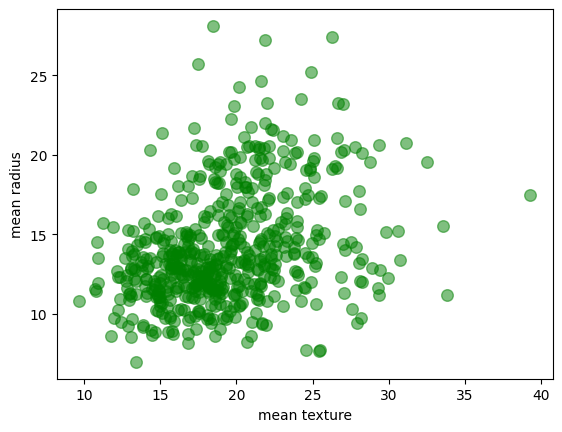

In [375]:
data.plot(kind="scatter", x="mean texture", y="mean radius",color="green",s=70, alpha=0.5 )
plt.show()

In [376]:
data.loc[31:43]

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
31,11.84,18.70,77.93,440.6,0.11090,0.15160,0.12180,0.05182,0.2301,0.07799,...,28.12,119.40,888.7,0.16370,0.57750,0.69560,0.15460,0.4761,0.14020,0
32,17.02,23.98,112.80,899.3,0.11970,0.14960,0.24170,0.12030,0.2248,0.06382,...,32.09,136.10,1344.0,0.16340,0.35590,0.55880,0.18470,0.3530,0.08482,0
33,19.27,26.47,127.90,1162.0,0.09401,0.17190,0.16570,0.07593,0.1853,0.06261,...,30.90,161.40,1813.0,0.15090,0.65900,0.60910,0.17850,0.3672,0.11230,0
34,16.13,17.88,107.00,807.2,0.10400,0.15590,0.13540,0.07752,0.1998,0.06515,...,27.26,132.70,1261.0,0.14460,0.58040,0.52740,0.18640,0.4270,0.12330,0
35,16.74,21.59,110.10,869.5,0.09610,0.13360,0.13480,0.06018,0.1896,0.05656,...,29.02,133.50,1229.0,0.15630,0.38350,0.54090,0.18130,0.4863,0.08633,0
36,14.25,21.72,93.63,633.0,0.09823,0.10980,0.13190,0.05598,0.1885,0.06125,...,30.36,116.20,799.6,0.14460,0.42380,0.51860,0.14470,0.3591,0.10140,0
37,13.03,18.42,82.61,523.8,0.08983,0.03766,0.02562,0.02923,0.1467,0.05863,...,22.81,84.46,545.9,0.09701,0.04619,0.04833,0.05013,0.1987,0.06169,1
38,14.99,25.20,95.54,698.8,0.09387,0.05131,0.02398,0.02899,0.1565,0.05504,...,25.20,95.54,698.8,0.09387,0.05131,0.02398,0.02899,0.1565,0.05504,0
39,13.48,20.82,88.40,559.2,0.10160,0.12550,0.10630,0.05439,0.1720,0.06419,...,26.02,107.30,740.4,0.16100,0.42250,0.50300,0.22580,0.2807,0.10710,0
40,13.44,21.58,86.18,563.0,0.08162,0.06031,0.03110,0.02031,0.1784,0.05587,...,30.25,102.50,787.9,0.10940,0.20430,0.20850,0.11120,0.2994,0.07146,0


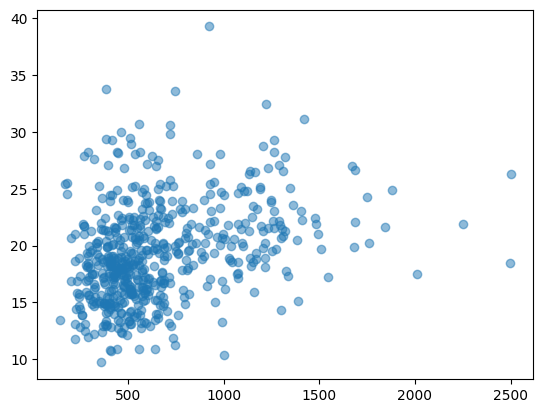

In [377]:
plt.scatter(x=data[['mean area']], y=data[['mean texture']],alpha=0.5)

In [378]:
data['target']

,target
0,0
1,0
2,0
3,0
4,0
...,...
564,0
565,0
566,0
567,0


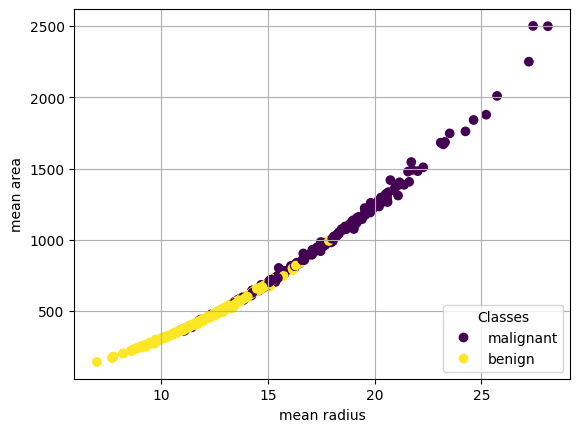

In [379]:
_, ax = plt.subplots()
scatter = ax.scatter(data[['mean radius']], data[['mean area']], c=data.target)
ax.set(xlabel='mean radius', ylabel='mean area')
_ = ax.legend(
    scatter.legend_elements()[0], cancer.target_names, loc="lower right", title="Classes"
)
ax.grid(True)

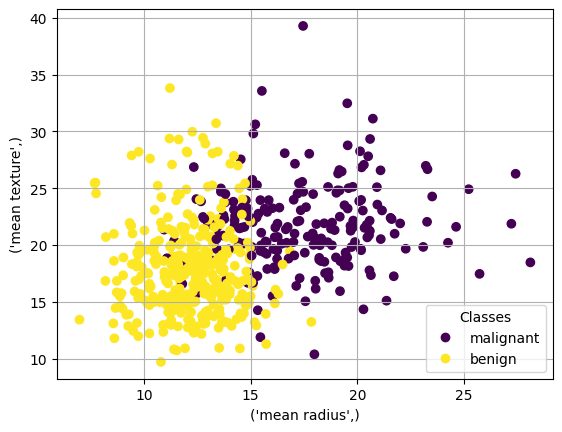

In [380]:
_, ax = plt.subplots()
scatter = ax.scatter(data.iloc[:,0], data.iloc[:, 1], c=data.target)
ax.set(xlabel=data.columns[0], ylabel=data.columns[1])
_ = ax.legend(
    scatter.legend_elements()[0],cancer.target_names, loc="lower right", title="Classes"
)
ax.grid(True)

In [381]:
data.columns[0]

('mean radius',)

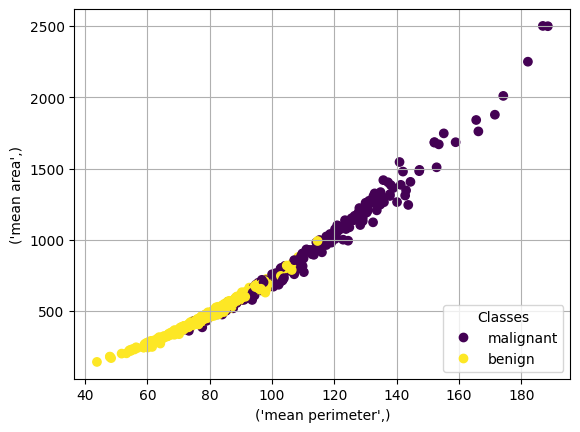

In [382]:
_, ax = plt.subplots()
scatter = ax.scatter(data.iloc[:, 2], data.iloc[:, 3], c=data.target)
ax.set(xlabel=data.columns[2], ylabel=data.columns[3])
_ = ax.legend(
    scatter.legend_elements()[0], cancer.target_names, loc="lower right", title="Classes"
)
ax.grid(True)

In [408]:
data.columns= data.columns.get_level_values((0))
data.columns
data.drop(columns={'level_0'},inplace=True)

# Count of number of records for each class

<Axes: xlabel='target', ylabel='count'>

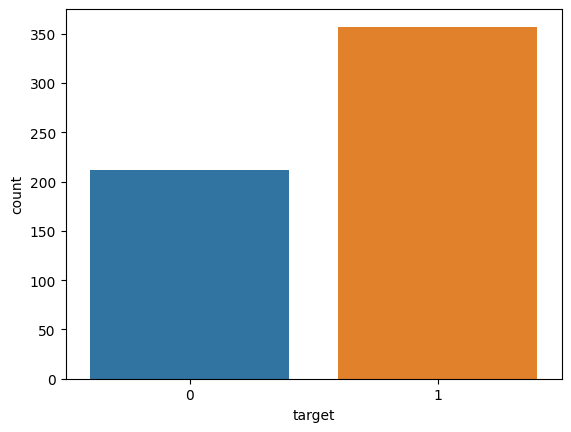

In [409]:
sns.countplot(data=data, x=data.target)


# Data Distribution Summarization

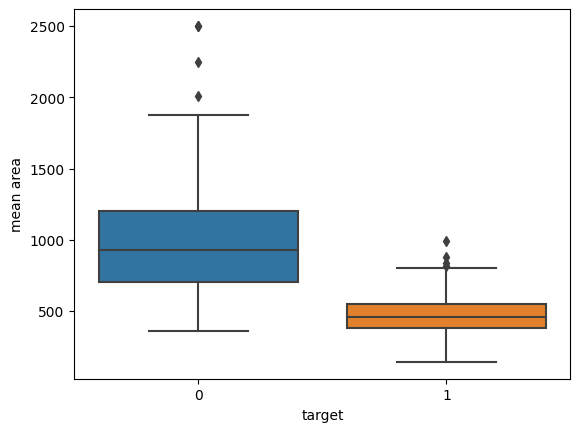

In [410]:
sns.boxplot(data= data, y=data.iloc[:,4],x=data.iloc[:,-1],)
plt.show()

In [411]:
# multiple plot representation in 1

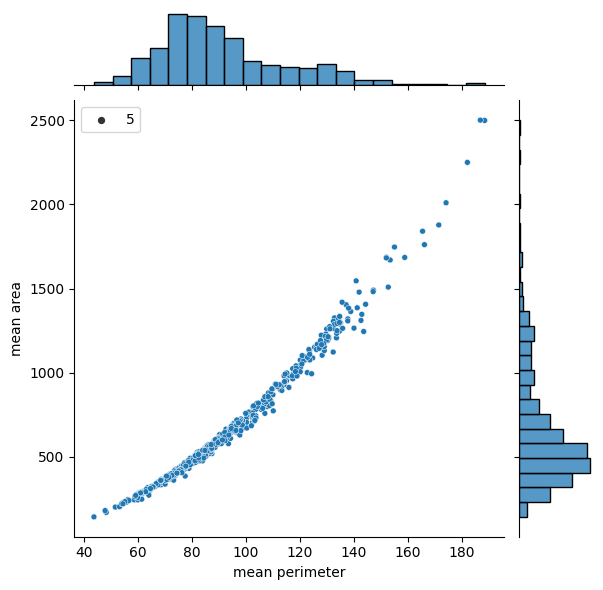

In [412]:
sns.jointplot(x=data.iloc[:, 3], y=data.iloc[:, 4], data=data, size=5)
plt.show()

# Data Ditribution with density

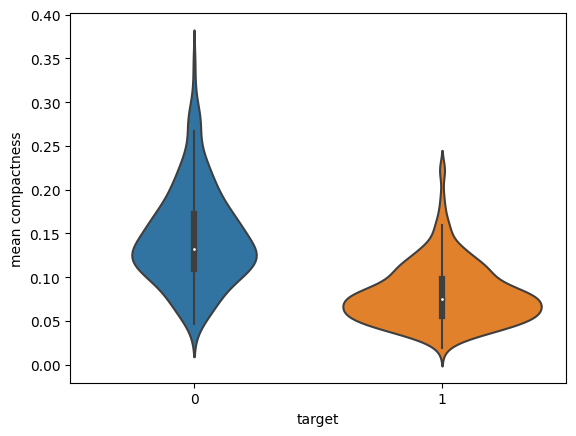

In [413]:
sns.violinplot(x=data.iloc[:,-1], y=data.iloc[:,6], data=data, size=6)
plt.show()

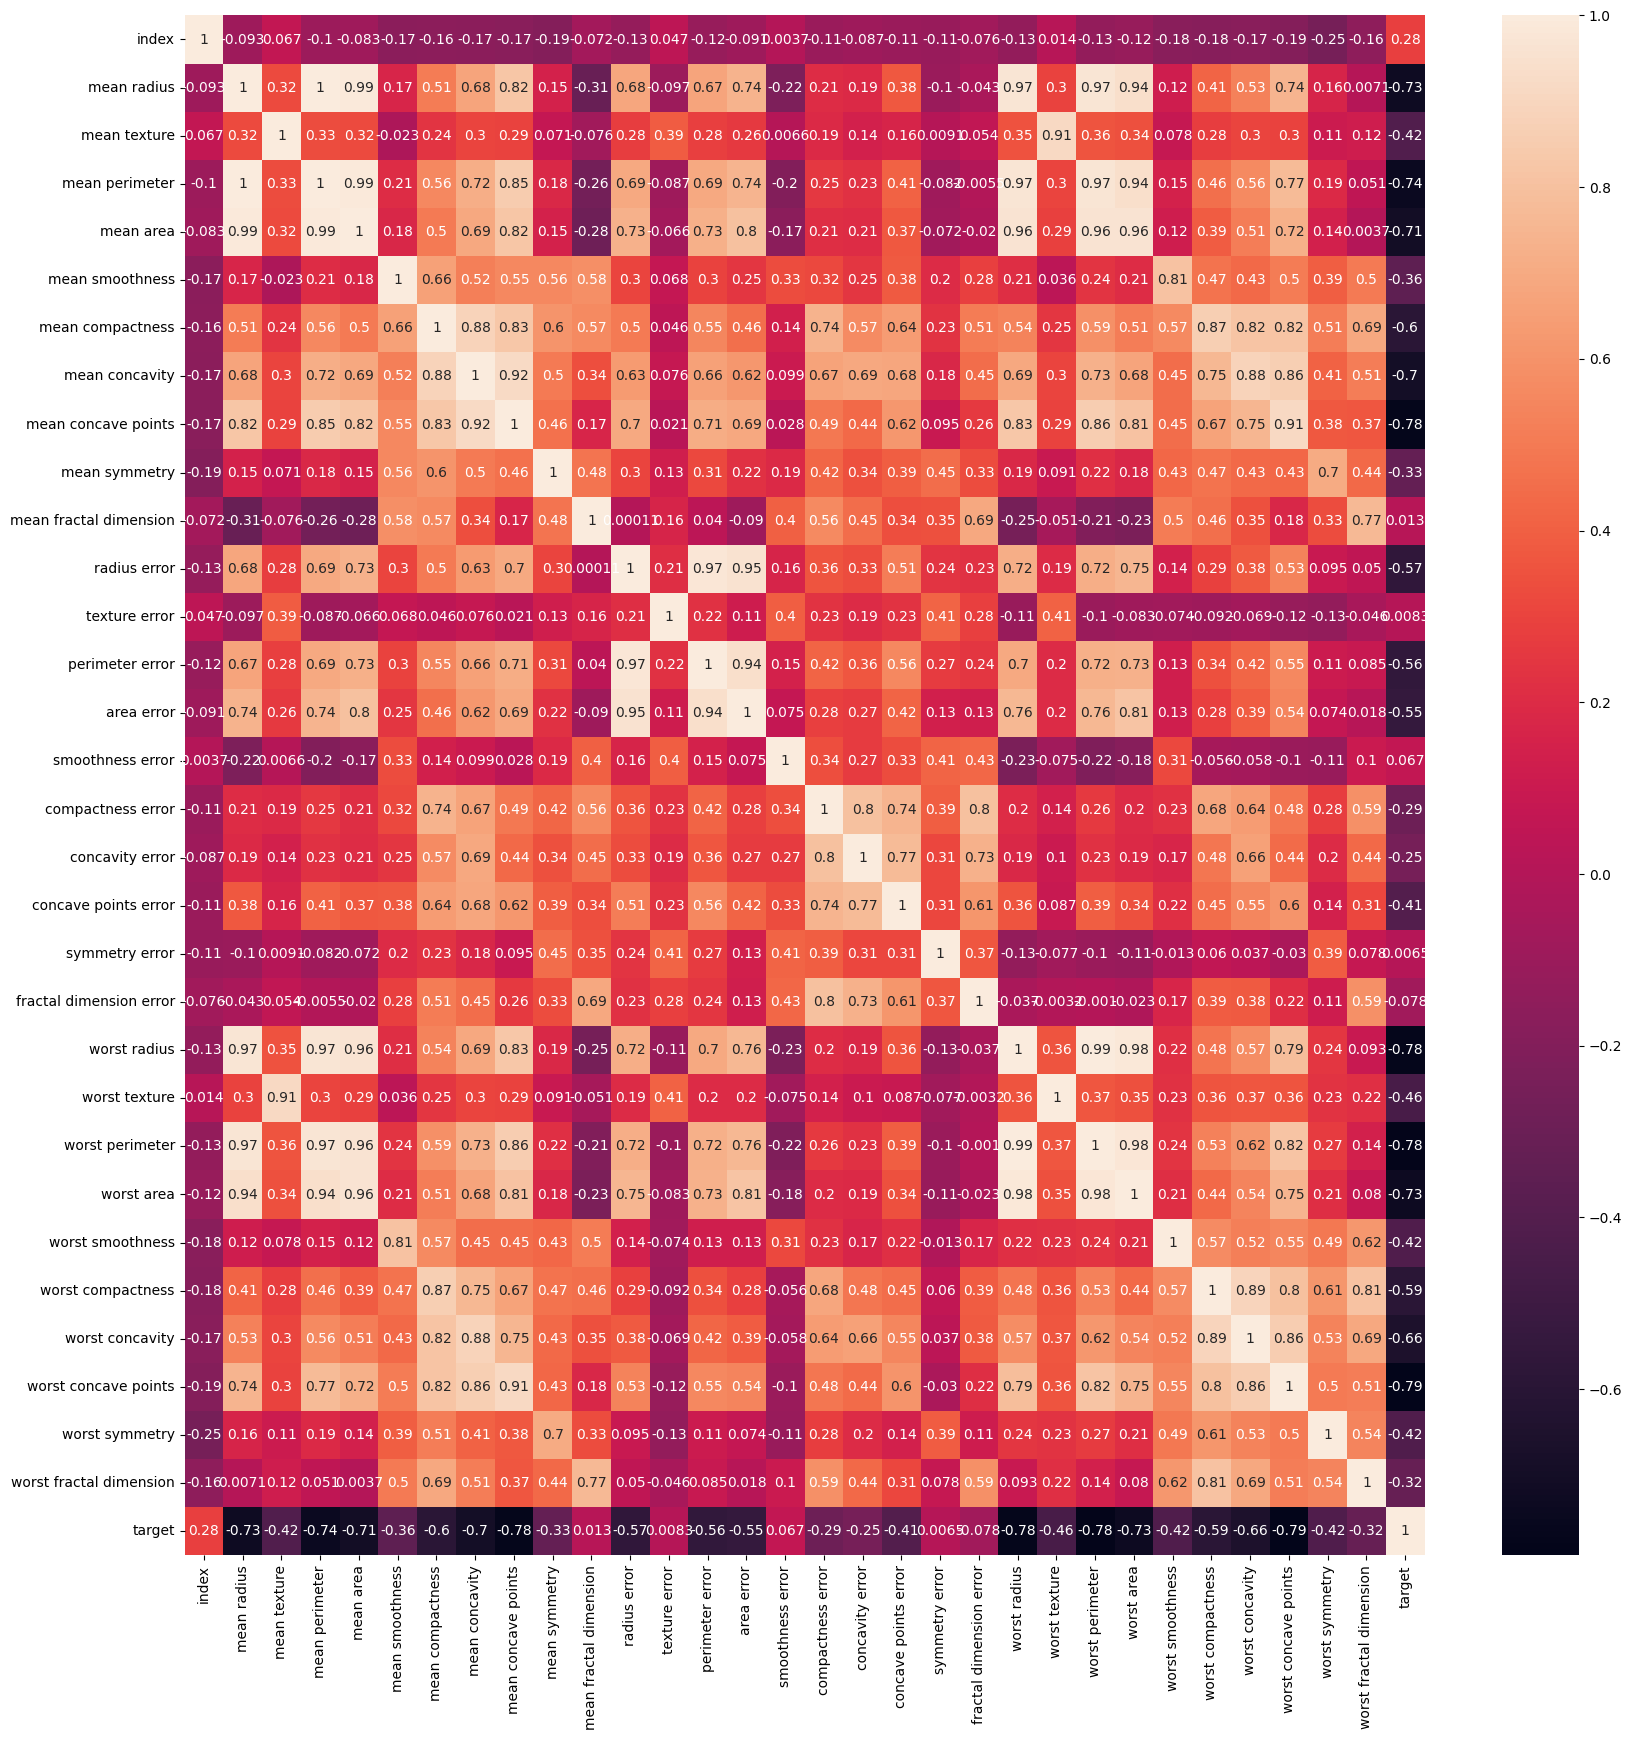

In [419]:
plt.figure(figsize=(20,20))
sns.heatmap(data.corr(),annot=True)
plt.show()

# Quick ML Model Implementation

In [421]:
data=data.drop(['index'],axis=1)
y=data['target']
x=data.drop(['target'],axis=1)

In [423]:
x_train, x_test, y_train, y_test= train_test_split(x,y,test_size=0.5,stratify=y) # stratify

In [426]:
model=DecisionTreeClassifier() # max_depth=int
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [443]:
y_pred=model.predict(x_test)

In [429]:
print(classification_report(y_test,model.predict(x_test)))

              precision    recall  f1-score   support

           0       0.88      0.93      0.90       106
           1       0.96      0.92      0.94       179

    accuracy                           0.93       285
   macro avg       0.92      0.93      0.92       285
weighted avg       0.93      0.93      0.93       285



In [439]:
confusion_matrix(y_test, y_pred)


array([[ 99,   7],
       [ 14, 165]])

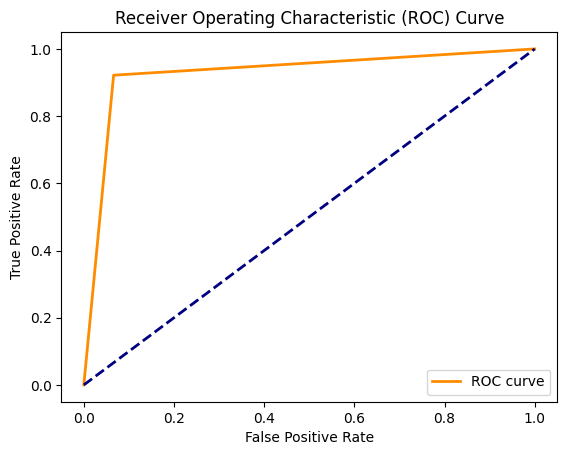

In [450]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [449]:
auc = roc_auc_score(y_test, y_pred)
print("AUC:", auc)

AUC: 0.927874986824075


In [ ]:
data.count

#Closing Note
## Fainess  in Machine Learning

Systems should treat everyone fairly and avoiding discrimination.

What can help?
the System **inputs** means **Data**

It will help to build inclusive, transparent and Accountable Systems  